# 1) Complex Numbers in Python

In [1]:
import math
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
3 + 2j

(3+2j)

In [3]:
a = 3
b = 3
z = a + b * 1j
print('z = ', z)
print('The type of variable is ', type(z))

z =  (3+3j)
The type of variable is  <class 'complex'>


In [4]:
(2.75 + 3.69j) * (8.55 - 6.13j)

(46.1322+14.692000000000004j)

In [6]:
1.4 * math.e**5.32j

(0.799270785858235-1.1494199453957457j)

In [7]:
(7.51-9.15j)/(4.43+9.64j)

(-0.4880897698448308-1.0033441577191493j)

# 2) Shapes Created by the Joukowski Transformation

In [22]:
N = 50
x_start, x_end = -2.0, 2.0
y_start, y_end = -5.0, 5.0
x = numpy.linspace(x_start, x_end, N)
y = numpy.linspace(y_start, y_end, N)
X, Y = numpy.meshgrid(x, y)

In [23]:
z = x + y*1j
c = 1

In [24]:
def joukowski(zeta, constant):
    """
    Returns the Joukowski Transformation for z and c
    
    Parameters
    ----------
    zeta: 1D numpy array of floats
        1D complex plane
    constant: float
        constant parameter of joukowski transformation
        
    Returns
    -------
    eta: 2D numpy array of floats
        joukowski transformation
    """
    J = zeta + constant**2/zeta
    return J

/home/gil/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


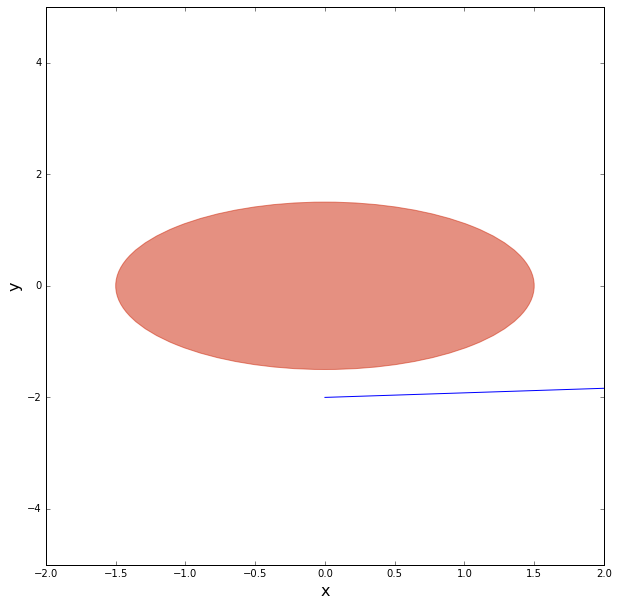

In [25]:
# compute Joukowski
Eta = joukowski(z, c)

# Choose radius
R = 1.5

# plot z-plane circle
size = 10
pyplot.figure(figsize=(size,size))
pyplot.xlabel('x', fontsize = 16)
pyplot.ylabel('y', fontsize = 16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
circle = pyplot.Circle((0,0), radius=R, color='#CD2305', alpha=0.5)
pyplot.gca().add_patch(circle)
pyplot.plot(z)